In [62]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

df = pd.read_csv('heart-disease.csv', delimiter=',')
X = df.drop('target', axis=1)
y = df['target']

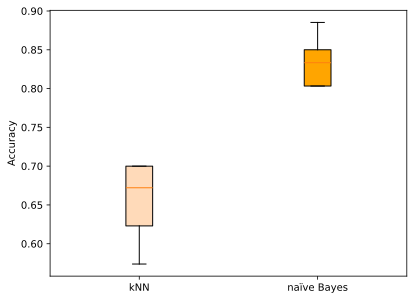

In [74]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
# from sklearn import metrics

# n_folds = 5
# accs = [[], []]
# folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

# predictors = [KNeighborsClassifier(), GaussianNB()]

# for train_k, test_k in folds.split(X, y):
#     for _ in range(len(predictors)):
#         X_train, X_test = X.iloc[train_k], X.iloc[test_k]
#         y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
#         predictors[_].fit(X_train, y_train)
#         y_pred = predictors[_].predict(X_test)
#         accs[_].append(round(metrics.accuracy_score(y_test, y_pred),2))

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

accs = [cross_val_score(KNeighborsClassifier(), X, y, cv=folds, scoring='accuracy'),
        cross_val_score(GaussianNB(), X, y, cv=folds, scoring='accuracy')]

labels = ['kNN', 'naïve Bayes']
colors = ['peachpuff', 'orange']

fig, ax = plt.subplots()
ax.set_ylabel('Accuracy')

bplot = ax.boxplot(accs, patch_artist=True, tick_labels=labels)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()
# scales the numeric variables to [0, 1]
df_scaled[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = MinMaxScaler().fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

X_scaled = df_scaled.drop('target', axis=1)
y_scaled = df_scaled['target']

folds_scaled = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn_accs = cross_val_score(KNeighborsClassifier(), X_scaled, y_scaled, cv=folds_scaled, scoring='accuracy')
naive_accs = cross_val_score(GaussianNB(), X_scaled, y_scaled, cv=folds_sc  aled, scoring='accuracy')

print('kNN accuracy =', round(np.mean(knn_accs),2), "±", round(np.std(knn_accs),2))
print('naïve Bayes accuracy =', round(np.mean(naive_accs),2), "±", round(np.std(naive_accs),2))


kNN accuracy = 0.83 ± 0.02
naïve Bayes accuracy = 0.84 ± 0.03


In [73]:
from scipy import stats

res = stats.ttest_rel(accs[0], accs[1], alternative='greater')
print("Not scaled:\nkNN > naïve Bayes?\npval=", round(res.pvalue, 3))

res = stats.ttest_rel(knn_accs, naive_accs, alternative='greater')
print("\nScaled:\nkNN > naïve Bayes?\npval=", round(res.pvalue, 3))

Not scaled:
kNN > naïve Bayes?
pval= 0.999

Scaled:
kNN > naïve Bayes?
pval= 0.504
